Loading Dataset for Machine Learning Model

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/nandh/OneDrive/Desktop/cardheko/Car_Dekho_Cleaned_Dataset.csv")
df.head()

C:\Users\nandh\AppData\Local\Temp\ipykernel_17536\312853953.py:3: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/nandh/OneDrive/Desktop/cardheko/Car_Dekho_Cleaned_Dataset.csv")


,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,Seats
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.561711,0.428571
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.347826,0.428571
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.587658,0.428571
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.421459,0.428571
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.580996,0.428571


Train-Test Split For Cleaned Dataset

In [3]:
from sklearn.model_selection import train_test_split

# Assuming df is the preprocessed DataFrame
X = df[['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName','City','mileage', 'Seats']]
y = df['price']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the lengths of the train and test datasets
print("X_train length:", len(X_train))
print("X_test length:", len(X_test))
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

X_train length: 6008
X_test length: 1503
y_train length: 6008
y_test length: 1503


Linear Regression with Cross-Validation and Regularization (Grid Search for Ridge and Lasso)

C:\Users\nandh\AppData\Local\Temp\ipykernel_8308\3886146410.py:10: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/nandh/OneDrive/Desktop/cardheko/Car_Dekho_Cleaned_Dataset.csv")


Linear Regression CV Mean MSE: 42911933968.4852
Linear Regression - MSE: 48351470014.415855, MAE: 158699.20287340562, R²: 0.6239615938705363


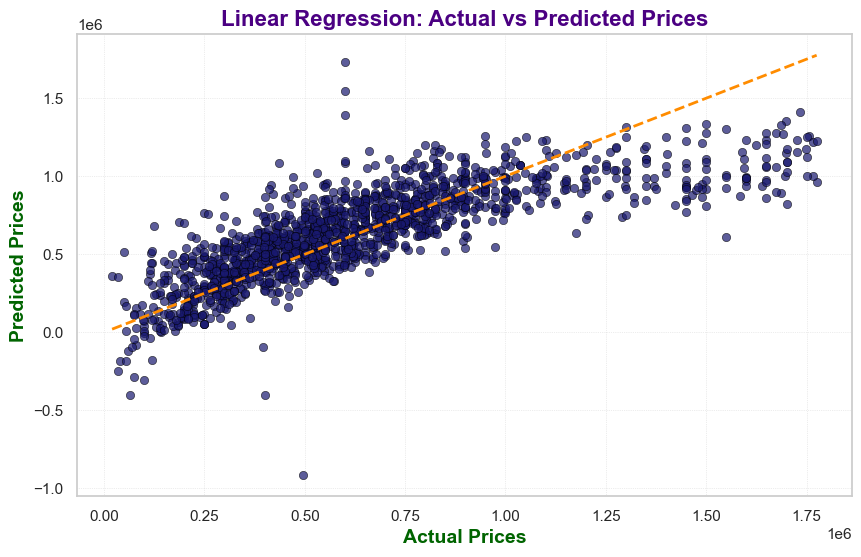

Best Ridge Alpha: {'alpha': 1}
Best Lasso Alpha: {'alpha': 100}


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/nandh/OneDrive/Desktop/cardheko/Car_Dekho_Cleaned_Dataset.csv")

# Define features and target
X = df[['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats']]
y = df['price']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')

# Plotting Actual vs Predicted

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Setting a clean whitegrid style
sns.scatterplot(x=y_test, y=y_pred_lr, color='midnightblue',  edgecolor='black', alpha=0.7)

# Plotting the perfect prediction line in a vibrant color
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkorange', linewidth=2, linestyle='--')

# Customizing labels and title with a more creative font and color
plt.xlabel('Actual Prices', fontsize=14, color='darkgreen', fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, color='darkgreen', fontweight='bold')
plt.title('Linear Regression: Actual vs Predicted Prices', fontsize=16, color='indigo', fontweight='bold')

# Adding a grid and enhancing readability
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

# Showing the plot
plt.show()


# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')

Gradient Boosting with Cross-Validation and Hyperparameter Tuning (Random Search)

Gradient Boosting CV Mean MSE: 22155057770.53112
Gradient Boosting - MSE: 25097389873.630695, MAE: 108576.23916320053, R²: 0.8048129150307934


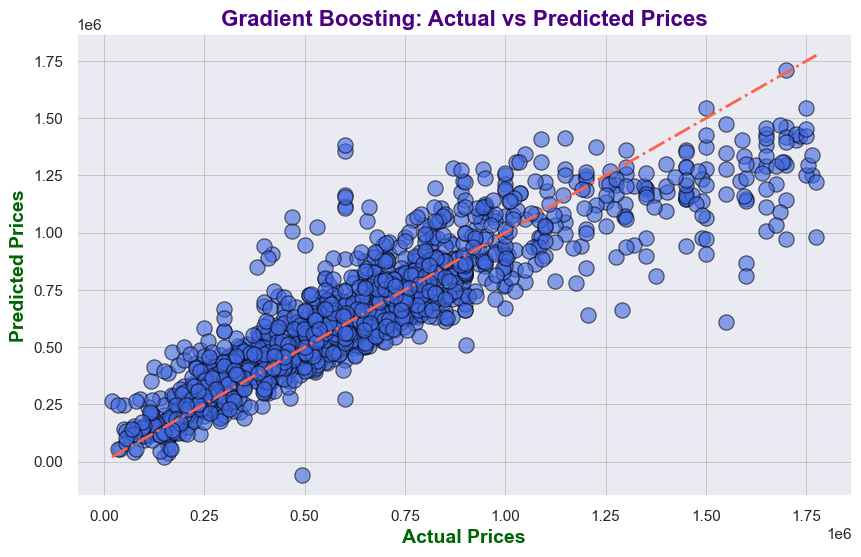

Best Gradient Boosting Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05}


In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Cross-Validation
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gbr_cv_scores.mean()}')

# Model Prediction
y_pred_gbr = gbr_model.predict(X_test)

# Model Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R²: {r2_gbr}')

# Plotting Actual vs Predicted with creative style
plt.figure(figsize=(10, 6))

# Set a creative plot style
sns.set(style="darkgrid")  # Using a dark grid style for better contrast

# Scatter plot with custom colors and markers
sns.scatterplot(x=y_test, y=y_pred_gbr, color='royalblue', s=120, marker='o', edgecolor='black', alpha=0.6)

# Plotting the perfect prediction line with a unique color and line style
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='tomato', linewidth=2, linestyle='-.')

# Customizing the labels and title with bold and colorful fonts
plt.xlabel('Actual Prices', fontsize=14, color='darkgreen', fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, color='darkgreen', fontweight='bold')
plt.title('Gradient Boosting: Actual vs Predicted Prices', fontsize=16, color='indigo', fontweight='bold')

# Adding a grid with subtle lines
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)

# Showing the plot
plt.show()


# Hyperparameter Tuning using Random Search
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
gbr_random = RandomizedSearchCV(gbr_model, gbr_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbr_random.fit(X_train, y_train)

print(f'Best Gradient Boosting Params: {gbr_random.best_params_}')

Decision Tree with Cross-Validation and Hyperparameter Tuning (Grid Search)

Decision Tree CV Mean MSE: 43201186286.646324
Decision Tree - MSE: 45922060695.05516, MAE: 152517.0616255033, R²: 0.6428555635474891


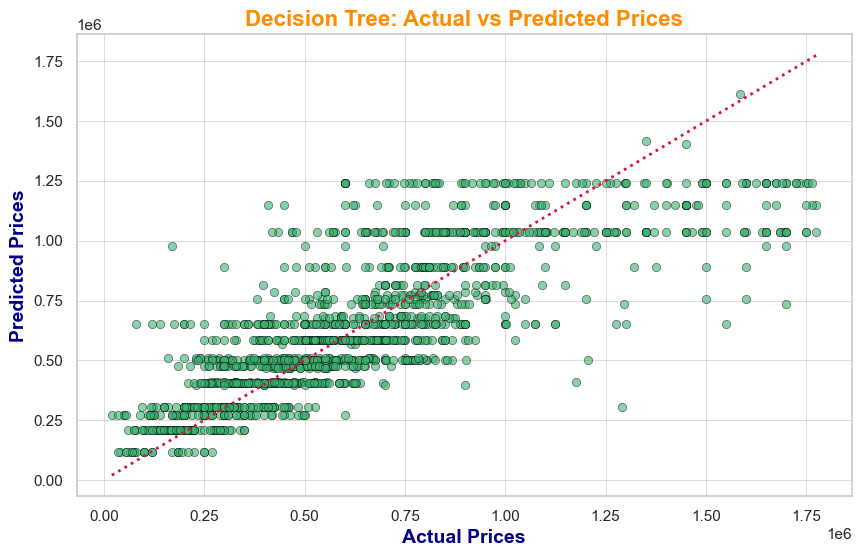

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')

# Plotting Actual vs Predicted with creative style
plt.figure(figsize=(10, 6))

# Set a creative plot style
sns.set(style="whitegrid")  # Using a clean whitegrid style for clarity

# Scatter plot with custom colors and markers
sns.scatterplot(x=y_test, y=y_pred_dt, color='mediumseagreen', edgecolor='black', alpha=0.6)

# Plotting the perfect prediction line with a contrasting color and line style
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='crimson', linewidth=2, linestyle=':')

# Customizing the labels and title with bold and colorful fonts
plt.xlabel('Actual Prices', fontsize=14, color='darkblue', fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, color='darkblue', fontweight='bold')
plt.title('Decision Tree: Actual vs Predicted Prices', fontsize=16, color='darkorange', fontweight='bold')

# Adding a grid with subtle lines
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.4)

# Showing the plot
plt.show()


# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f'Best Decision Tree Params: {dt_grid.best_params_}')

Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

Random Forest CV Mean MSE: 15653428899.590662
Random Forest - MSE: 16375013605.622261, MAE: 78405.33242562495, R²: 0.8726484631228255


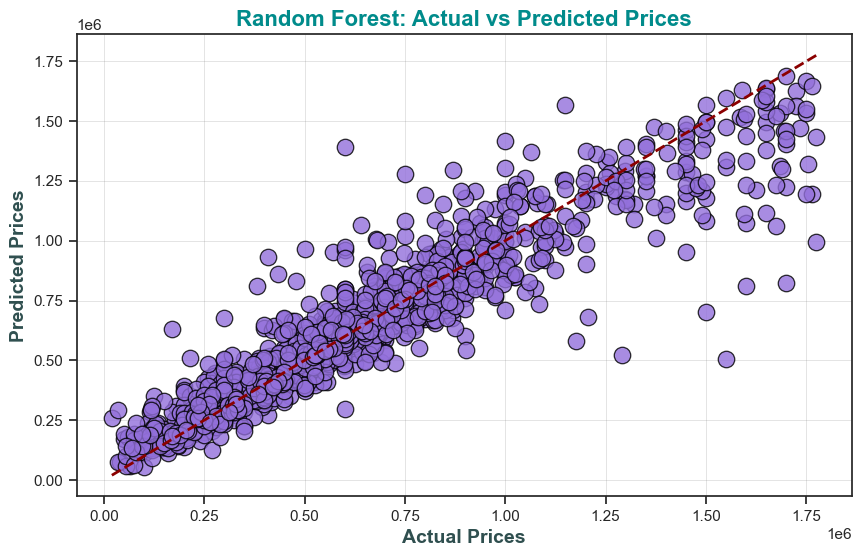

Best Random Forest Params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# Plotting Actual vs Predicted with creative style
plt.figure(figsize=(10, 6))

# Set a creative plot style
sns.set(style="ticks")  # Using the 'ticks' style for a modern, sharp look

# Scatter plot with custom colors and markers
sns.scatterplot(x=y_test, y=y_pred_rf, color='mediumpurple', s=140,  edgecolor='black', alpha=0.8)

# Plotting the perfect prediction line with a contrasting color and line style
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkred', linewidth=2, linestyle='--')

# Customizing the labels and title with bold and colorful fonts
plt.xlabel('Actual Prices', fontsize=14, color='darkslategray', fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, color='darkslategray', fontweight='bold')
plt.title('Random Forest: Actual vs Predicted Prices', fontsize=16, color='darkcyan', fontweight='bold')

# Adding a grid with subtle lines and background color
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.3)

# Showing the plot
plt.show()


# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')

Summary and Comparison Table

In [8]:
import pandas as pd

# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_gbr, mse_dt, mse_rf],
    'MAE': [mae_lr, mae_gbr, mae_dt, mae_rf],
    'R²': [r2_lr, r2_gbr, r2_dt, r2_rf]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"MAE: {best_model_mae}")
print(f"R²: {best_model_r2}")

Model Comparison Table:
               Model           MSE            MAE        R²
0  Linear Regression  4.835147e+10  158699.202873  0.623962
1  Gradient Boosting  2.509739e+10  108576.239163  0.804813
2      Decision Tree  4.592206e+10  152517.061626  0.642856
3      Random Forest  1.637501e+10   78405.332426  0.872648

Best Model Summary:
Best Model: Random Forest
MSE: 16375013605.622261
MAE: 78405.33242562495
R²: 0.8726484631228255


Finalized Model Training :


C:\Users\nandh\AppData\Local\Temp\ipykernel_8308\2964864835.py:12: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/nandh/OneDrive/Desktop/cardheko/Car_Dekho_Cleaned_Dataset.csv")


Random Forest CV Mean MSE: 13595530784.837751
Random Forest - MSE: 13448159595.57039, MAE: 74234.38521676224, R²: 0.895411152997309
Training Time: 568.461252450943 seconds
Prediction Time: 0.18496108055114746 seconds
Older Cars - MSE: 4079720047.394986, MAE: 36362.56713664403, R²: 0.9683531676957758


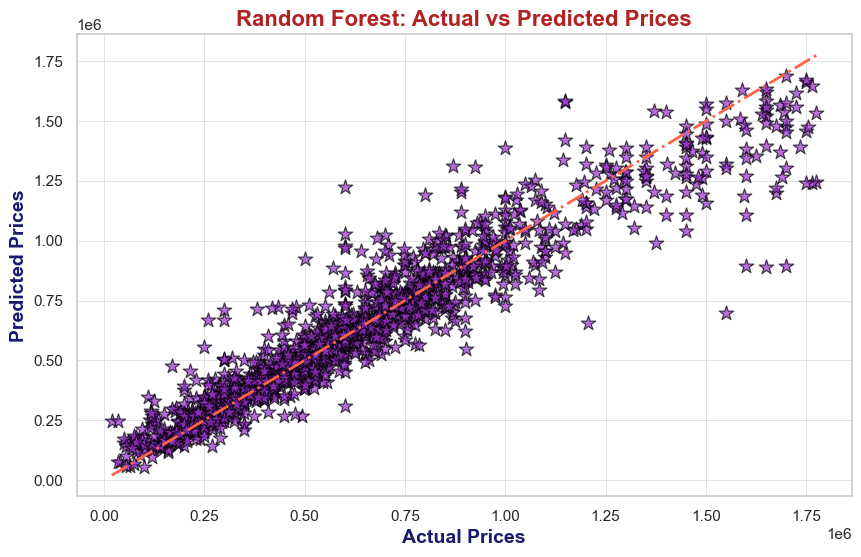

Model training complete. Model saved as 'car_price_prediction_model.pkl'.


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

# Load dataset
data = pd.read_csv("C:/Users/nandh/OneDrive/Desktop/cardheko/Car_Dekho_Cleaned_Dataset.csv")
# Load preprocessing steps
label_encoders = joblib.load("C:/Users/nandh/OneDrive/Desktop/cardheko/Label_Encoders.pkl")
scalers = joblib.load("C:/Users/nandh/OneDrive/Desktop/cardheko/Scalers.pkl")

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['mileage'] / data['car_age']

# Define features and target
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV for hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_rf_model = rf_random.best_estimator_

# Cross-Validation
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
start_predict_time = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price']

y_pred_older = best_rf_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

# Plotting Actual vs Predicted with creative style
plt.figure(figsize=(10, 6))

# Set a creative plot style
sns.set(style="whitegrid")  # Using a whitegrid style for a clean and crisp look

# Scatter plot with custom colors and markers
sns.scatterplot(x=y_test, y=y_pred_rf, color='darkorchid', s=120, marker='*', edgecolor='black', alpha=0.7)

# Plotting the perfect prediction line with a vibrant color and line style
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='tomato', linewidth=2, linestyle='-.')

# Customizing the labels and title with bold and colorful fonts
plt.xlabel('Actual Prices', fontsize=14, color='midnightblue', fontweight='bold')
plt.ylabel('Predicted Prices', fontsize=14, color='midnightblue', fontweight='bold')
plt.title('Random Forest: Actual vs Predicted Prices', fontsize=16, color='firebrick', fontweight='bold')

# Adding a grid with subtle lines
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.3)

# Showing the plot
plt.show()

# Save the trained model
joblib.dump(best_rf_model,"C:/Users/nandh/OneDrive/Desktop/cardheko/Car_Price_Prediction_Model.pkl")
print("Model training complete. Model saved as 'car_price_prediction_model.pkl'.")